## Polynomial Regression

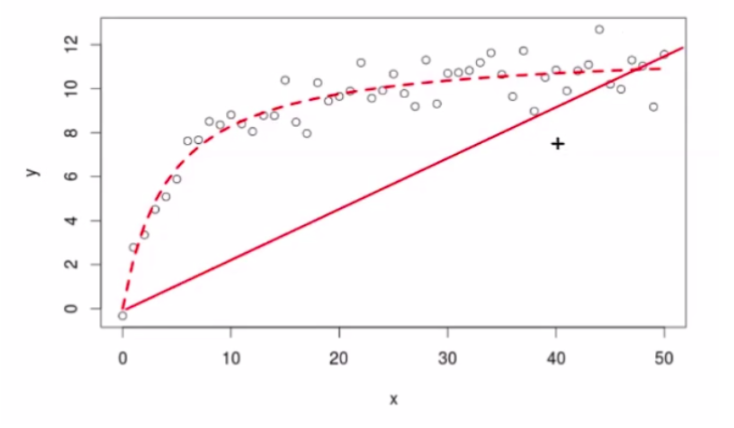

Modelimiz doğrusal bir çizgi ile doğru tahmin yapamıyorsa polinom derecesini arttırarak bu durumu önlemeye çalışırız. Tahmini iyileştirmeye çalışırız.

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişken arasındaki ilişkinin n'inci derece polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x^2 + b1x + b0	 2.derece

3rd degree ---> Cubic     b3x^3 + b2x^2 + b1x + b0 3.derece

## Imprort Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
data = np.array([[2,3,4]])
data

array([[2, 3, 4]])

In [6]:
trans = PolynomialFeatures(degree= 2, include_bias =False)          # 2 nci dereceden Polynomial Features üreteceğim

In [7]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [8]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [9]:
trans.fit_transform(data)                                           # trans.fit ve transform birlikte yapılıyor

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [10]:
# degree 2 yapınca feature sayısı artıyor 
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

# degree 3 yapınca hem feature sayısı artıyor hemde işlemin yorumlanması zorlaşıyor işler karmaşıklaşıyor
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3*
# *3, 4**3

## Read Dataset

In [11]:
df = pd.read_csv("Advertising.csv")

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
X = df.drop("sales", axis =1)
y = df.sales

In [14]:
poly_conv = PolynomialFeatures(degree= 2 , include_bias = False)

In [15]:
poly_conv

PolynomialFeatures(include_bias=False)

In [16]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [17]:
poly_features =poly_conv.transform(X)                                #Polynomial feature çevirdik

In [18]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [19]:
poly_features.shape

(200, 9)

df te 200 rows 4 columns vardı. poly_features sonrası 200 rows 9 columns oldu. columns sayısı arttı bunları görelim

degree = 2 olduğundan 3sütun karesi 9 adet sütun oldu 

In [20]:
poly_df = pd.DataFrame(poly_features, columns =["TV", "radio", "newspaper", 
                                      "TV^2", "TV&Radio","TV&Newspaper",
                                      "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()
poly_df.head()
# yeni features leri columns names vererek return ettik

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


polynomial regressionun bize sağladığı en büyük yarar; underfitting ve overfitting ile nasıl mücadele edeceğimiz konusunda bize datalar sağlar.

yeni fetaures lar oluşturarak modelin background unda modelimizin yüksek tahminler yapması için hazırlık yapıyoruz

## Train | Test Split

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, 
                                                    test_size= 0.3, random_state= 101)

# X olarak yeni oluşturduğum poly_features datasını veriyoruz.

In [23]:
model_poly = LinearRegression()

In [24]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model_poly.predict(X_test)

In [26]:
my_dict = {"Actual": y_test, "prediction": y_pred, "residual": y_test-y_pred}

compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,prediction,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


residuals lara bakılırsa tahmin hatalarının çok düşük olduğu görülür.

polinomial eğriye yönelince hataların düştüğünü görüyoruz. aşağıda grafik olarakta residuals ların küçük değerler aldığı görülür

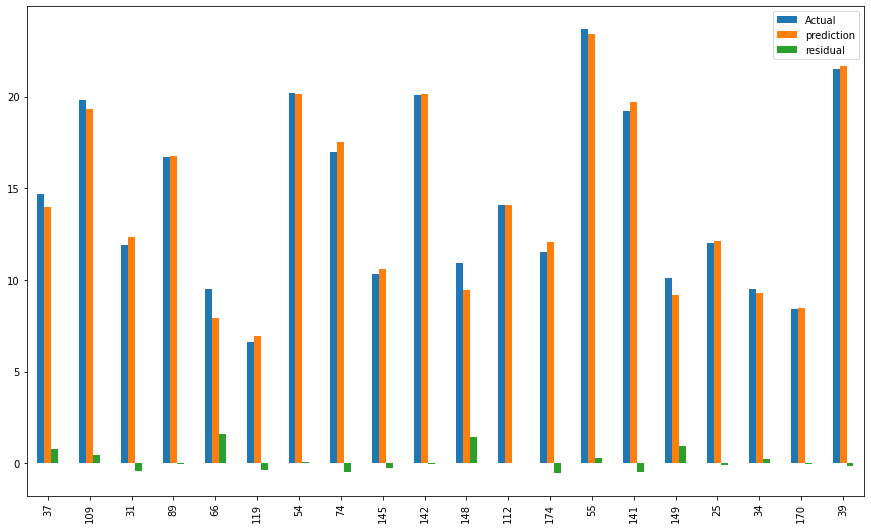

In [27]:
compare.head(20).plot(kind="bar", figsize=(15,9))
plt.show();

In [28]:
# katsayılar
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [29]:
poly_df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", 
                                                  "TV^2", "TV&Radio","TV&Newspaper", 
                                                  "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [30]:
poly_df_coef                         # fetaures lara ait katsayıları df olarak görüyoruz

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [31]:
poly_df.head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


poly_df in sütunları arasında TV^2 fetaure nın değerlerinin en yüksek değerleri aldığı gözlemlenebiliyor. 

poly_df_cof te modelin katsayılarına bakarsak TV^2 nin katsayısının en küçük değerlerden olduğu gözlemlenir.

burada multiple linear konusunda karşılaştığımız benzer durum var. en yüksek değerleri içeren feature ın katsayı değeri düşük çıktı

burada features lar kendi değerleri arasında ağırlıklandırılarak katsayı değerleri belirleniyor.

sadece katsayı değerlerine bakarak features lar hakkında yorum yaparsak yanılabiliriz. en düşük katsayıya sahip olan fetaure, en yüksek değerleri barındırıyor. etkisi en yüksek feature ı katsayılara bakarak bulmaya çalışırsak hata yapabiliriz. buna bakarak fetaure selection yapmak doğru olmaz.

scaling ile bu değerlendirme daha sağlıklı yapılır. ilerleyen konularda

In [32]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

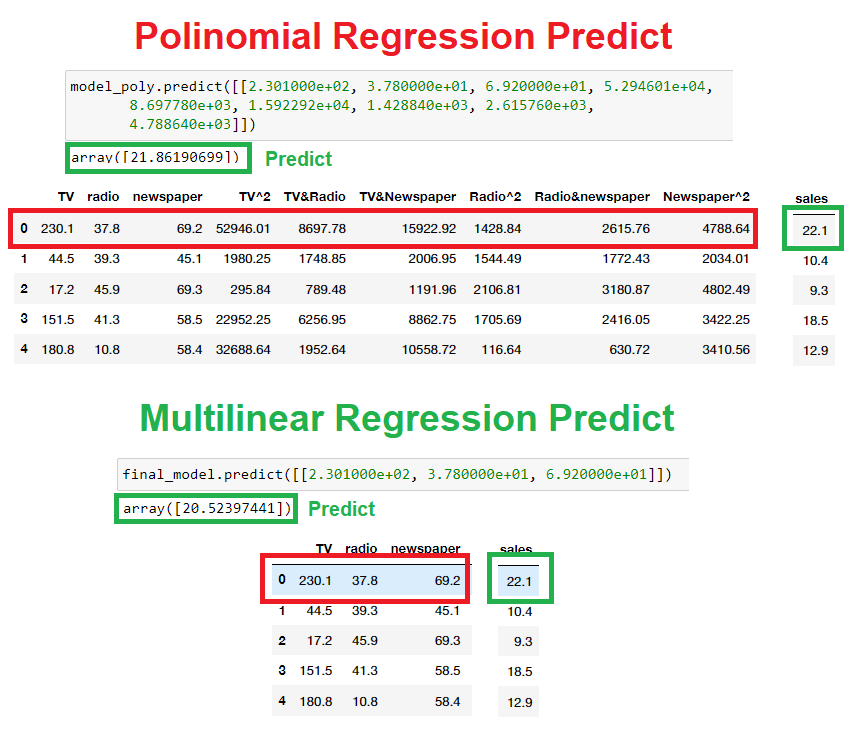

yukarıdaki görselden anlaşılacak durum özetle :

* polynomial regression modeli ile yapılan y_pred değeri 21.86190699

* multiple linear regression modeli ile yapılan y_pred değeri 20.52397441

görüldüğü gibi polynomial regression ile yapılan tahmin değeri gerçek sales değerine (22.1) daha yakın. daha başarılı bir tahmin yapılmıştır.

## Evaluation on the Test Set

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model_poly.predict(X_test)

In [34]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146783
MAE 		: 0.4896798044803811
MSE 		: 0.4417505510403745
RMSE 		: 0.6646431757269268


In [35]:
y_train_pred = model_poly.predict(X_train)

In [38]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391516405
MSE 		: 0.34569391424439955
RMSE 		: 0.587957408529223


* Simple Linear Regression:
    - MAE : 1.213
    - RMSE : 1.516
    - r2_score : 0.8609
* Polynomial 2-degree:
    - MAE : 0.48
    - RMSE : 0.66
    - r2_score : 0.9868

In [39]:
def poly(d):
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        number_of_features.append(poly_features.shape[1])
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features},
                        index=range(1,d))

In [41]:
poly(10) # 4. derecede model ovefitting e giriyor.

# pol optimum değeri bulmak için bu fonksiyonu kullandık
# çıktıya baktığımızda en optimum pol değerinin 3 olduğunu görmüş olduk. Aslında 4 te kullanılabilir ancak 
# patlama noktasından bi öncekini kullanmak uygun olmuyor. 5. noktadan sonra overfitting oluyor.

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575831,55
6,0.197126,4.492669,83
7,5.421420,1381.404374,119
8,0.141804,4449.599765,164
9,0.166544,95891.245438,219


Polinom derecesini arttırdıkça datadaki patternı yakalayarak daha yakın kıvrımlı grafik çizen model test datasında da başarı elde ediyor ikisinde de hata düşüyor. Fakat belli bir polinom derecesinden sonra model test datadaki patternı bırakıp noktalarım yerini ezberleyerek modeli değiştirmeye başlayınca bu sefer test datada başarısız olup hata payı artmaya başlıyor. Modelin datadaki patterni bırakıp yerlerine göre birşeyler yapmaya başladığı nokta overfitting başladığı nokta.

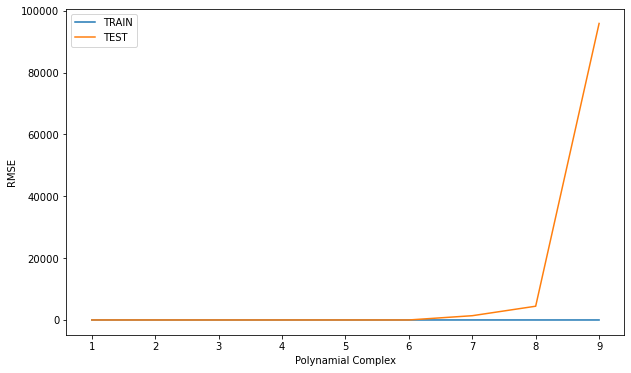

In [43]:
# yukarıdaki kodun grafik hali

plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

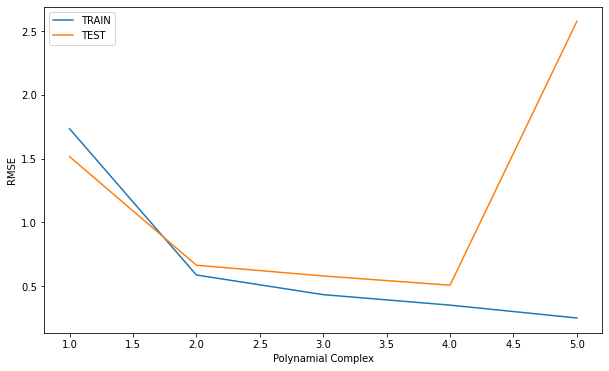

In [44]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

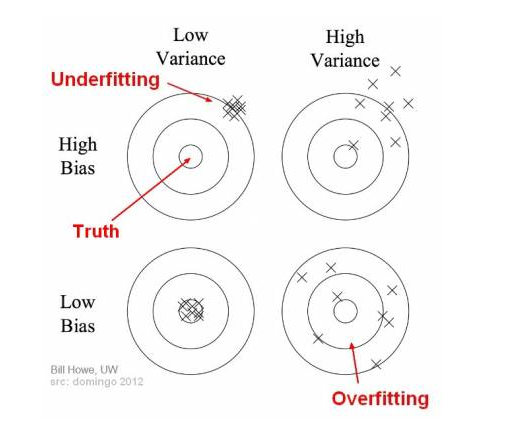
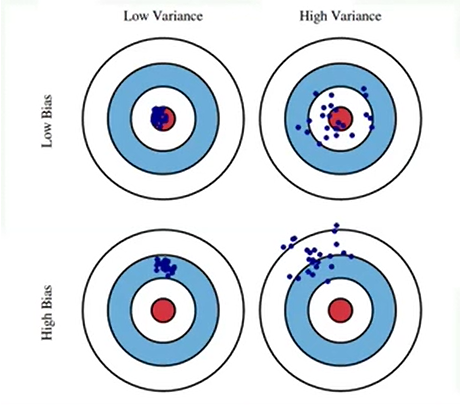
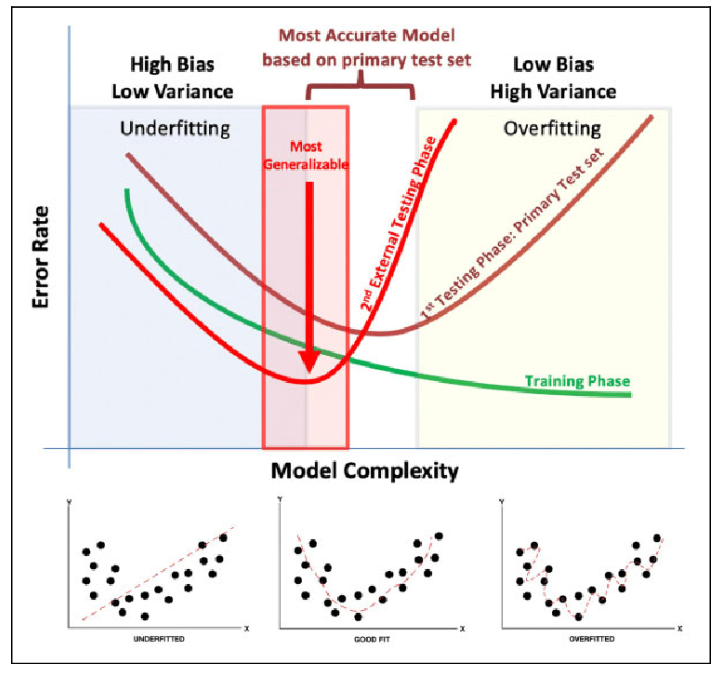


## Finalizing Model Choice

In [45]:
final_poly_conv = PolynomialFeatures(degree = 3, include_bias=False )

In [46]:
final_model = LinearRegression()

In [47]:
final_model.fit(final_poly_conv.fit_transform(X), y)

LinearRegression()

## Predictions

In [49]:
new_record = [[150, 20, 15]]

In [50]:
new_record_poly = final_poly_conv.fit_transform(new_record)

In [51]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [49]:
final_model.predict(new_record_poly)

array([14.24950844])

## Overfitting

In [59]:
over_model = LinearRegression()
over_poly_conv = PolynomialFeatures(degree = 5, include_bias=False )

In [57]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_conv.fit_transform(X), y, test_size=0.3, random_state=101)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_conv.fit_transform(X), y, test_size=0.3, random_state=101)

over_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred_over = over_model.predict(X_test)

In [62]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649876777710491
MAE 		: 0.6659587783287028
MSE 		: 6.634906397076104
RMSE 		: 2.575831205082372


# Testing data performance:
--------------------------
* R2_score 	: 0.8609466508230367
* MAE 		: 1.5116692224549084
* MSE 		: 3.796797236715222
* RMSE 		: 1.9485372043446392

## Training data performance:
--------------------------
* R2_score 	: 0.9055159502227753
* MAE 		: 1.1581502948072524
* MSE 		: 2.4793551789057866
* RMSE 		: 1.574596830590544